In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,scale
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, mean_squared_error, r2_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
sns.set()
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving House Price Prediction Dataset.csv to House Price Prediction Dataset.csv


In [ ]:
house_price = pd.read_csv('House Price Prediction Dataset.csv')

In [ ]:
house_price

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [ ]:
house_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [ ]:
house_price.head(30)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
5,6,3944,1,2,1,1906,Urban,Poor,No,93262
6,7,3671,1,1,2,1948,Rural,Poor,Yes,448722
7,8,3419,2,4,1,1925,Suburban,Good,Yes,594893
8,9,630,2,2,1,1932,Rural,Poor,Yes,652878
9,10,2185,3,3,1,2000,Downtown,Poor,No,340375


In [ ]:
house_price=house_price.drop('Id', axis=1)

In [ ]:
map_location = ["Downtown", "Suburban", "Rural", "Urban"]


In [ ]:
location_map = {"Downtown":3, "Suburban":1, "Rural":2, "Urban":4}


#how i convert location string to numbers

In [ ]:
house_price['Location'] = house_price['Location'].map(location_map)

In [ ]:
house_price.head(30)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,3,Excellent,No,149919
1,2,4272,5,4,3,1958,3,Excellent,No,424998
2,3,3592,2,2,3,1938,3,Good,No,266746
3,4,966,4,2,2,1902,1,Fair,Yes,244020
4,5,4926,1,4,2,1975,3,Fair,Yes,636056
5,6,3944,1,2,1,1906,4,Poor,No,93262
6,7,3671,1,1,2,1948,2,Poor,Yes,448722
7,8,3419,2,4,1,1925,1,Good,Yes,594893
8,9,630,2,2,1,1932,2,Poor,Yes,652878
9,10,2185,3,3,1,2000,3,Poor,No,340375


In [ ]:
condition_map = ["Excellent", "Good", "Fair", "Poor"]

In [ ]:
condition_map = {"Excellent": 4,
                 "Good": 3,
                 "Fair": 2,
                 "Poor": 1
                 }

In [ ]:
house_price['Condition'] = house_price['Condition'].map(condition_map)

In [ ]:
house_price

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,3,4,No,149919
1,2,4272,5,4,3,1958,3,4,No,424998
2,3,3592,2,2,3,1938,3,3,No,266746
3,4,966,4,2,2,1902,1,2,Yes,244020
4,5,4926,1,4,2,1975,3,2,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,1,1,No,295620
1996,1997,3046,5,2,1,2019,1,1,Yes,580929
1997,1998,1062,5,1,2,1903,2,1,No,476925
1998,1999,4062,3,1,2,1936,4,4,Yes,161119


In [ ]:
Garage_map = {"No":1, "Yes":2}

In [ ]:
house_price['Garage'] = house_price['Garage'].map(Garage_map)

In [ ]:
house_price.head(30)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,3,4,1,149919
1,2,4272,5,4,3,1958,3,4,1,424998
2,3,3592,2,2,3,1938,3,3,1,266746
3,4,966,4,2,2,1902,1,2,2,244020
4,5,4926,1,4,2,1975,3,2,2,636056
5,6,3944,1,2,1,1906,4,1,1,93262
6,7,3671,1,1,2,1948,2,1,2,448722
7,8,3419,2,4,1,1925,1,3,2,594893
8,9,630,2,2,1,1932,2,1,2,652878
9,10,2185,3,3,1,2000,3,1,1,340375


In [ ]:
house_price=house_price.drop('Id', axis=1)

In [ ]:
house_price

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,3,4,1,149919
1,4272,5,4,3,1958,3,4,1,424998
2,3592,2,2,3,1938,3,3,1,266746
3,966,4,2,2,1902,1,2,2,244020
4,4926,1,4,2,1975,3,2,2,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,1,1,1,295620
1996,3046,5,2,1,2019,1,1,2,580929
1997,1062,5,1,2,1903,2,1,1,476925
1998,4062,3,1,2,1936,4,4,2,161119


In [ ]:
x = house_price.drop('Price', axis=1)
y = house_price['Price']

In [ ]:
y

,Price
0,149919
1,424998
2,266746
3,244020
4,636056
...,...
1995,295620
1996,580929
1997,476925
1998,161119


In [ ]:
x

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1360,5,4,3,1970,3,4,1
1,4272,5,4,3,1958,3,4,1
2,3592,2,2,3,1938,3,3,1
3,966,4,2,2,1902,1,2,2
4,4926,1,4,2,1975,3,2,2
...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,1,1,1
1996,3046,5,2,1,2019,1,1,2
1997,1062,5,1,2,1903,2,1,1
1998,4062,3,1,2,1936,4,4,2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
train_data = pd.concat([x_train, y_train], axis=1)

In [ ]:
train_data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
968,4483,4,4,3,1933,4,4,1,434325
240,1062,3,3,1,1970,3,3,1,614772
819,1422,3,4,1,1993,4,3,2,922811
692,2658,2,3,1,1972,2,1,2,794314
420,3286,2,4,1,1981,2,4,2,796988
...,...,...,...,...,...,...,...,...,...
1130,3483,5,3,3,1931,3,3,2,387088
1294,1747,3,3,2,1941,3,2,2,942215
860,1484,2,3,3,1973,3,3,1,323139
1459,3456,5,4,1,1955,3,3,2,274997


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>],
       [<Axes: title={'center': 'Floors'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Location'}>],
       [<Axes: title={'center': 'Condition'}>,
        <Axes: title={'center': 'Garage'}>,
        <Axes: title={'center': 'Garage_Encoded'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

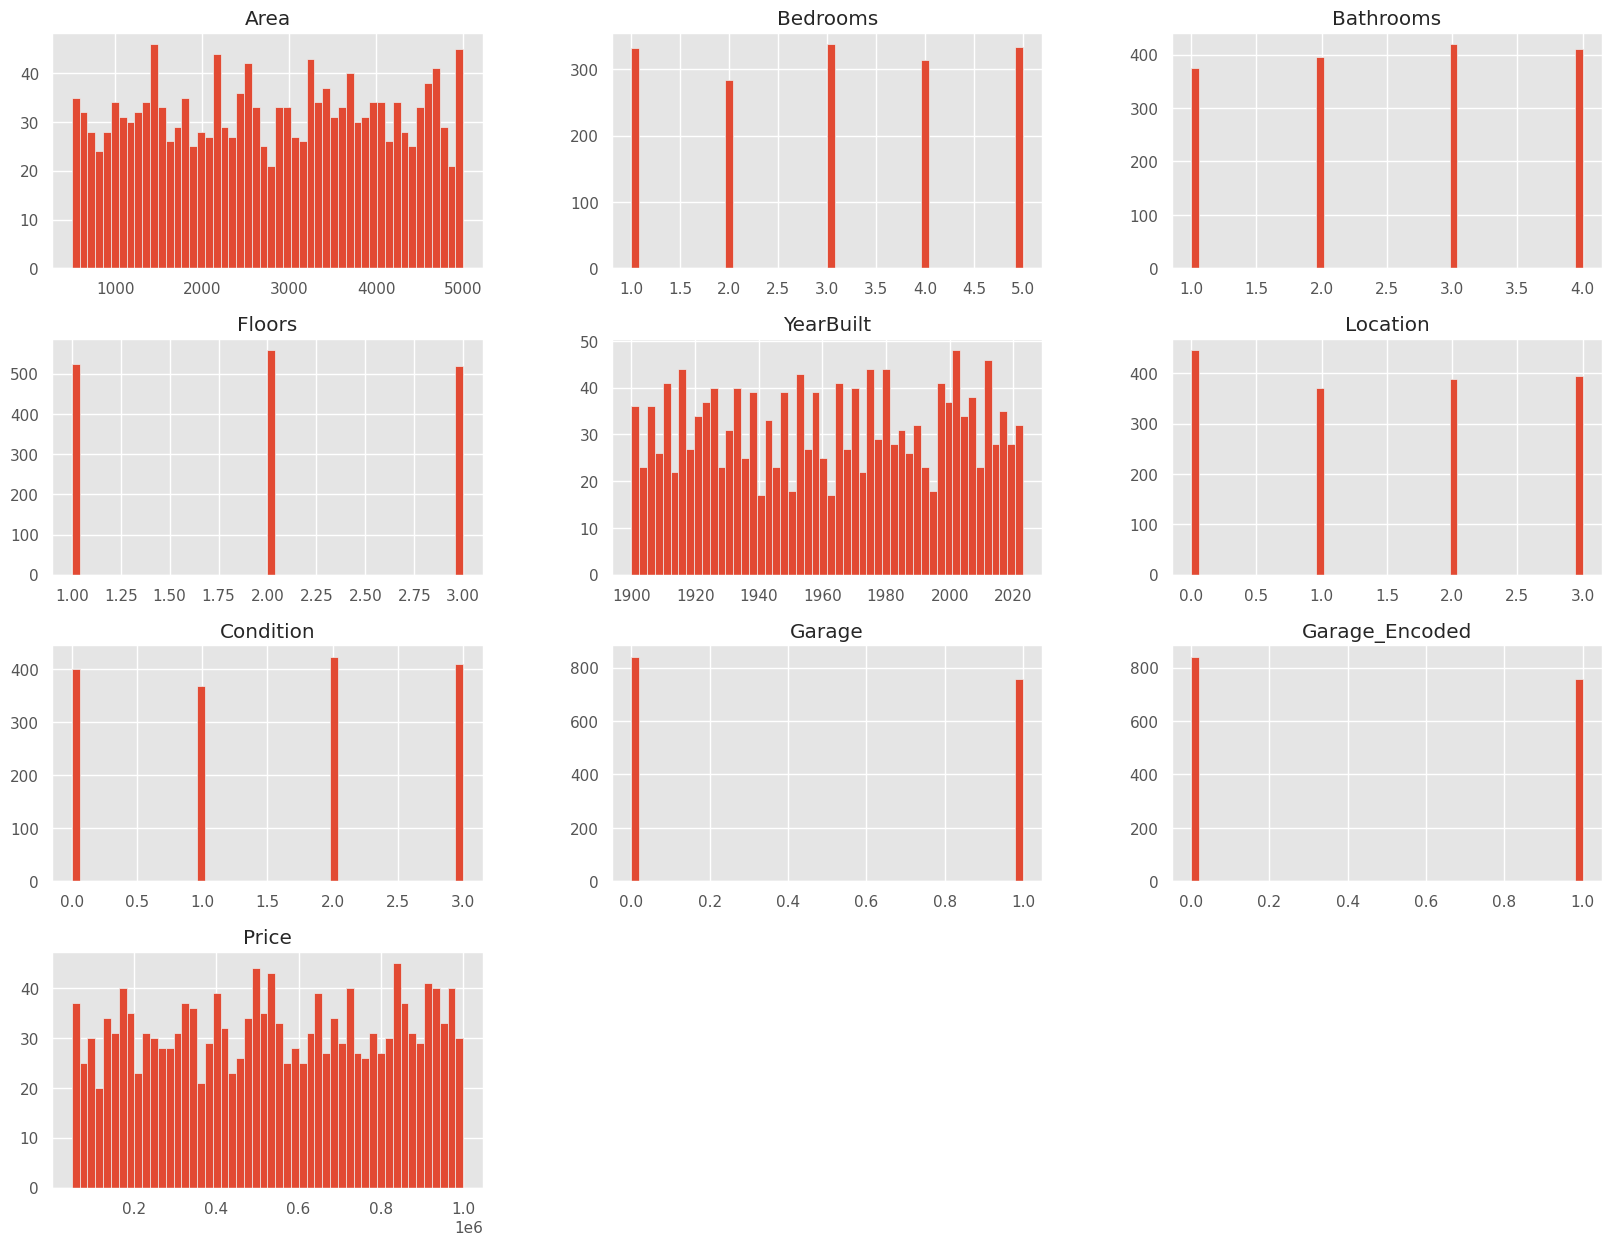

In [ ]:
train_data.hist(bins=50, figsize=(20,15))

<Axes: >

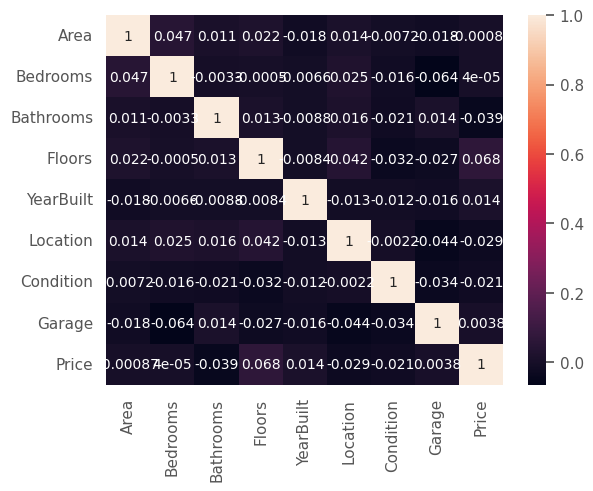

In [ ]:
sns.heatmap(train_data.corr(), annot=True)

In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
accurance = r2_score(y_test, y_pred)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 78461292297.9373


In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_s =scaler.fit_transform(x_train)
x_test_s =scaler.transform(x_test)

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_train_s, y_train)

LinearRegression()

In [ ]:
reg.score(x_train_s, y_train)

0.00786864923310282

In [ ]:
reg.score(x_test_s, y_test)

-0.008515086803247751

# random forest regressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
rf.score(x_train, y_train)

0.8517201560572183

In [ ]:
from sklearn.model_selection import GridSearchCV

rf=RandomForestRegressor()
para_grid={
    'n_estimators':[3,10,30],
    'max_features':[2,4,6,8]
}




grid_search = GridSearchCV(rf, para_grid, cv=5,
                           scoring="neg_mean_squared_error", verbose=2, return_train_score=True)

In [ ]:
grid_search.fit(x_train_s, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=30; total time=   0.2s
[CV] END ....................max_features=2, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [ ]:
rf=grid_search.score(x_test_s, y_test)

In [ ]:
rf=grid_search.score(x_test, y_test)

# XGBRegressor


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()


In [ ]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb.score(x_train, y_train)

0.9517470002174377

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()


param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.8, 1],
                         'gamma': [0, 0.1, 0.5], 'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.8, 1]})

In [ ]:

print(f"Best CV Score: {grid_search.best_score_:.2f}")

Best CV Score: -0.02


In [ ]:
best_model = grid_search.best_estimator_


In [ ]:
y_pred = best_model.predict(x_test)

In [ ]:
xgb.score(x_train, y_train)

0.9517470002174377

In [ ]:
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

R2 Score: -0.01


In [ ]:
import pickle

In [ ]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Save the model
with open('xgb.pkl', 'wb') as f:
    pickle.dump(xgb, f)
